# Multiple linear regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [18]:
df = pd.read_csv("50_Startups.csv")

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## preprocessing

In [20]:
X = df[['R&D Spend','Administration','Marketing Spend','State']]
y= df['Profit']

dummy vars

In [21]:
x_dummy = pd.get_dummies(df['State'],prefix='state')
x_dummy.head(2)

,state_California,state_Florida,state_New York
0,0,0,1
1,1,0,0


In [6]:
X = pd.concat([df[['R&D Spend','Administration','Marketing Spend']], x_dummy.iloc[:,:-1] ],axis=1)
# here you can check correlation and pvalue stuff

scaling

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2, random_state=0)

In [10]:
reg = LinearRegression()
reg.fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) * 100

93.47068473282425

In [11]:
ypred = reg.predict(Xtest)

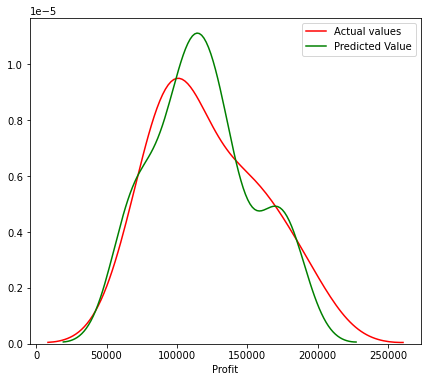

In [12]:
plt.figure(figsize=(7,6))
ax = sns.distplot(Ytest,hist=False,color='r',label='Actual values')
sns.distplot(ypred, hist=False,color='g',label='Predicted Value',ax=ax)
plt.show()

# predicting user input values

In [13]:
rdspend = input("enter R&D spend :")
adminpend = input("enter admin spend :")
mktspend = input("enter mkt spend :")
location = input('select a location [california,florida,new york]')
if location=='California':
    seq = [1,0]
elif location =='Florida':
    seq = [0,1]
else:
    seq = [0,0]

In [26]:
data = [int(rdspend),int(adminpend),int(mktspend)]+seq
xinput = scaler.transform(np.array(data).reshape(1,-1))
reg.predict(xinput)[0]

ValueError: invalid literal for int() with base 10: ''

NameError: name 'xinput' is not defined